In [111]:
import numpy as np
import math
from scipy.linalg import expm
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as ani 

In [188]:
def position(H):
    P = np.zeros(len(H))
    P[math.ceil(len(P)/2)-1] = 1
    G = np.zeros(len(H))
    for i in range(len(H)):
        G[i] = i
    return P, G

def unitary_evolution(H, P, t):
    x = np.dot(1j,H)
    U = expm(np.dot(t,x))
    psi = np.matmul(P,U)
    return psi

In [189]:
def CTQW_line(hadamard, N, tstart, tend):
    """Function that takes in an adjacency matrix and returns the unitary evolution operator, and plots the evolution visually"""
    H = hadamard(N)
    #defining the position array and central vertex
    P, G = position(H)
    #define time array
    T = np.linspace(tstart,tend,(tend-tstart)*5)
    #defining 'z' array for probabilities
    Z = np.zeros((len(G), len(T)))  

    #unitary evolution for each time step
    for i in range(len(T)):
        t_i = T[i]
        psi_i = unitary_evolution(H, P, t_i)
        for k in range(len(psi_i)):
            psi_i[k] = abs(psi_i[k])**2
        #mapping the probability to the 2D z array
        for j in range(len(G)):
            Z[j][i] = psi_i[j]

    c = int(len(T)/5)

    #plot contour
    plt.contourf(T,G,Z, cmap='YlOrRd')
    plt.colorbar(label='Probability')
    plt.title(f'Continuous Time Quantum Walk for {tend-tstart} seconds')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Position')
    plt.axvline(x=T[c], color='lime')
    plt.axvline(x=T[-1], color='lime')
    plt.show()

    Z_t = np.transpose(Z)
    #plot initial and final probability
    plt.bar(G, Z_t[c])
    plt.title(f'Continuous Time Quantum Walk after {round(T[c], 2)} seconds')
    plt.xlabel('Position')
    plt.ylabel('Probability')
    plt.show()
    plt.bar(G, Z_t[-1])
    plt.title(f'Continuous Time Quantum Walk after {tend-tstart} seconds')
    plt.xlabel('Position')
    plt.ylabel('Probability')
    plt.show()

    return T,G,Z

In [190]:
def line_hadamard(N):
    a = np.zeros((1, N))[0]
    b = np.ones((1, N-1))[0]
    H = np.diag(a, 0) + np.diag(b, -1) + np.diag(b, 1)

    A = nx.from_numpy_matrix(np.array(H))  
    nx.draw_spectral(A, with_labels=True)
    plt.title('Hadamard Representation')
    plt.show()

    return H 

In [191]:
def loop_hadamard(N):
    a = np.zeros((1, N))[0]
    b = np.ones((1, N-1))[0]
    H = np.diag(a, 0) + np.diag(b, -1) + np.diag(b, 1)
    H[0][N-1] = 1
    H[N-1][0] = 1

    A = nx.from_numpy_matrix(np.array(H))  
    nx.draw_circular(A, with_labels=True)
    plt.title('Hadamard Representation')
    plt.show()

    return H 

In [192]:
def loop_plus_hadamard(N):
    a = np.zeros((1, N))[0]
    b = np.ones((1, N-1))[0]
    H = np.diag(a, 0) + np.diag(b, -1) + np.diag(b, 1)
    H[0][N-1] = 1
    H[N-1][0] = 1
    H[1][3] = 1
    H[3][1] = 1

    A = nx.from_numpy_matrix(np.array(H))  
    nx.draw_circular(A, with_labels=True)
    plt.title('Hadamard Representation')
    plt.show()

    return H 

In [193]:
def peterson_hadamard(N):
    graph = nx.petersen_graph()

    nx.draw_shell(graph, with_labels=True, nlist=[range(5, 10), range(5)])
    plt.title('Hadamard Representation')
    plt.show()

    A = nx.linalg.graphmatrix.adjacency_matrix(graph)
    H = np.array(A.todense())
    
    return H 

In [194]:
def mobius_hadamard(N):
    graph = nx.moebius_kantor_graph()

    nx.draw_circular(graph, with_labels=True)
    plt.title('Hadamard Representation')
    plt.show()

    A = nx.linalg.graphmatrix.adjacency_matrix(graph)
    H = np.array(A.todense())
    
    return H 

In [205]:
def ladder_hadamard(N):
    graph = nx.ladder_graph(N)

    nx.draw_circular(graph, with_labels=True)
    plt.title('Hadamard Representation')
    plt.show()

    A = nx.linalg.graphmatrix.adjacency_matrix(graph)
    H = np.array(A.todense())
    
    return H 

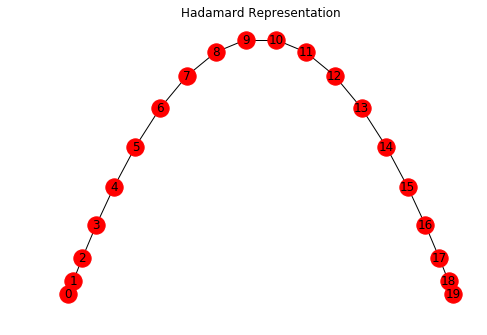

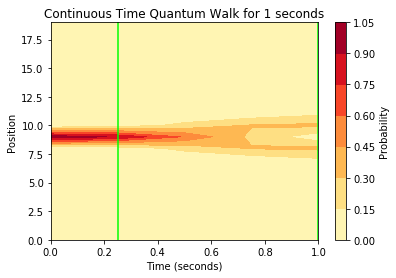

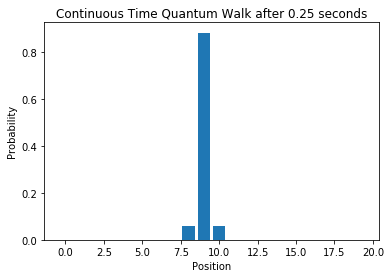

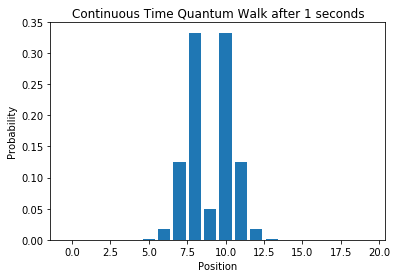

In [195]:
x,y,z = CTQW_line(line_hadamard, 20, 0, 1)

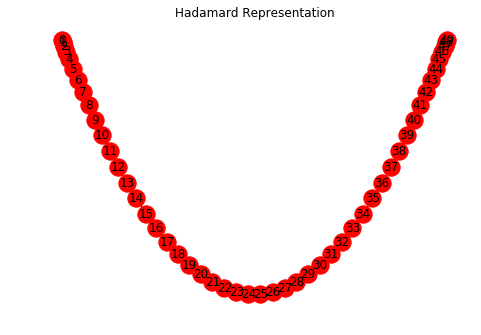

C:\Users\New\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


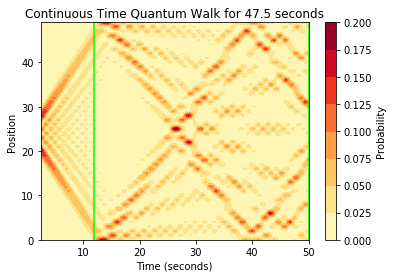

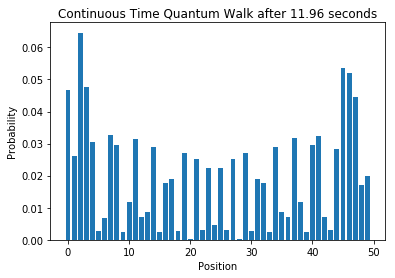

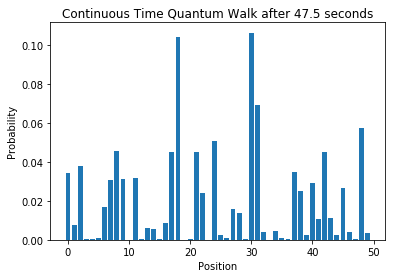

In [196]:
x,y,z = CTQW_line(line_hadamard, 50, 2.5, 50)

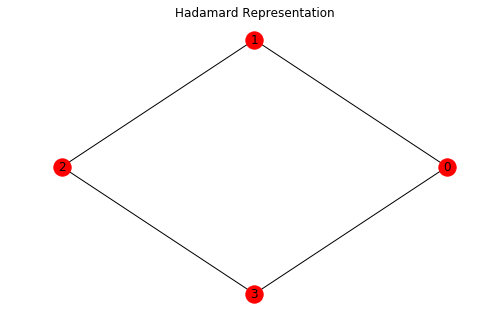

C:\Users\New\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


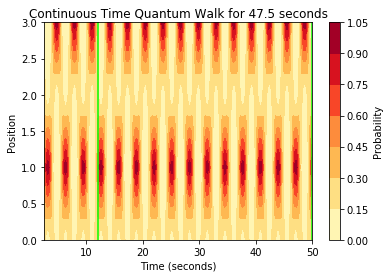

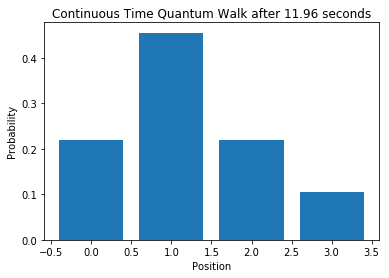

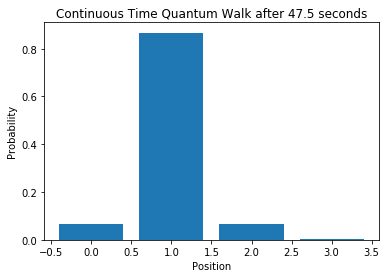

In [197]:
x,y,z = CTQW_line(loop_hadamard, 4, 2.5, 50)

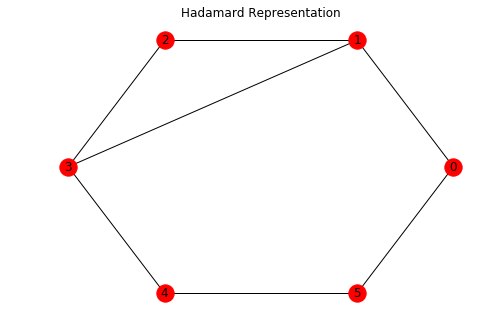

C:\Users\New\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


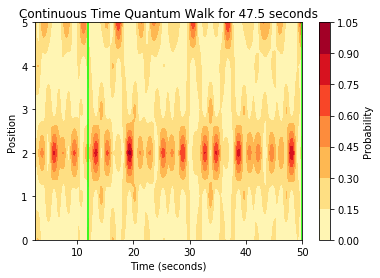

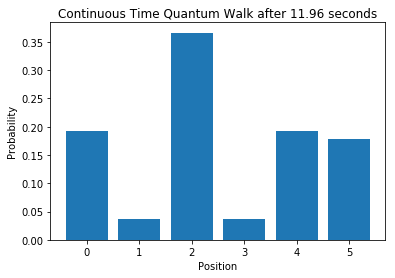

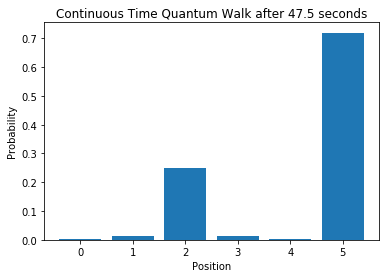

In [198]:
x,y,z = CTQW_line(loop_plus_hadamard, 6, 2.5, 50)

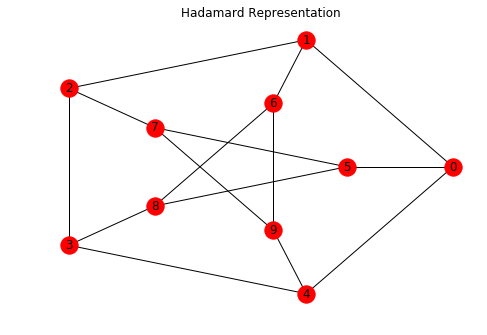

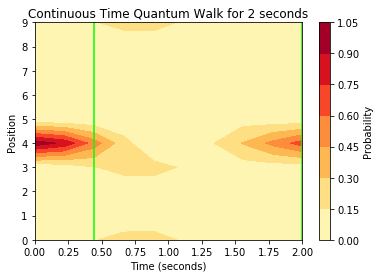

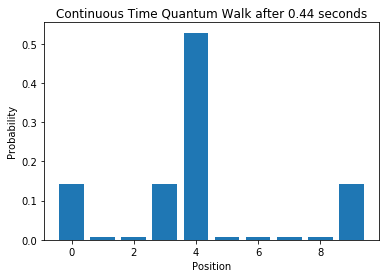

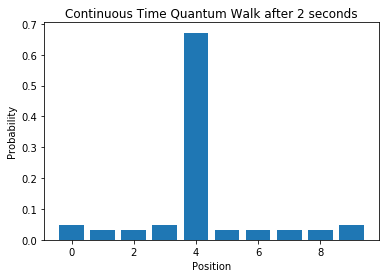

In [199]:
x,y,z = CTQW_line(peterson_hadamard, 6, 0, 2)

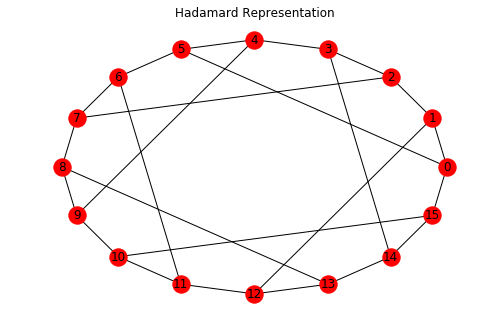

C:\Users\New\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


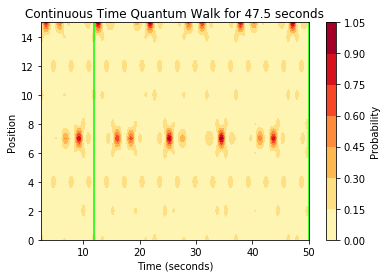

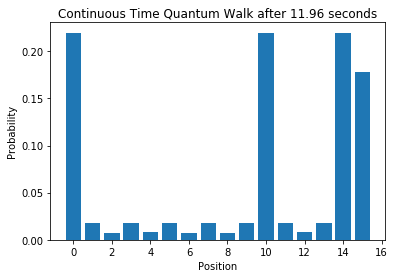

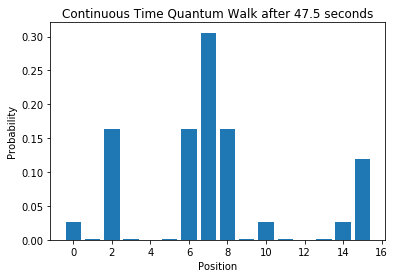

In [200]:
x,y,z = CTQW_line(mobius_hadamard, 6, 2.5, 50)

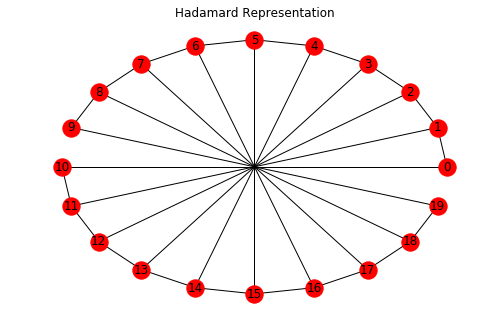

C:\Users\New\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


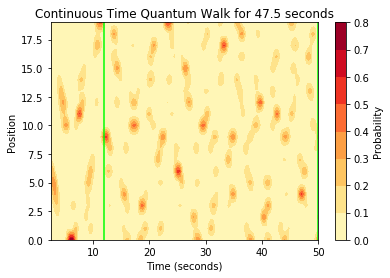

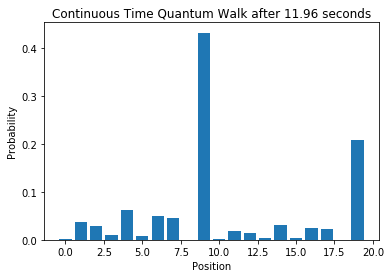

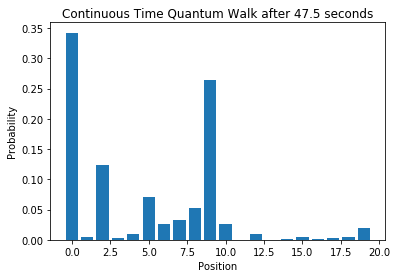

In [206]:
x,y,z = CTQW_line(ladder_hadamard, 10, 2.5, 50)